In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import r2_score,root_mean_squared_error,mean_absolute_error

In [3]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# encode the data
le=LabelEncoder()
for i in df.columns:
    if df[i].dtype=='object' or df[i].dtype=='category':
        df[i]=le.fit_transform(df[i])
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [6]:
# split data
x=df.drop('sex',axis=1)
y=df['sex']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
# load model
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [8]:
y_pred=model.predict(x_test)

In [9]:
# evaluate model
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.32      0.39        19
           1       0.65      0.80      0.72        30

    accuracy                           0.61        49
   macro avg       0.57      0.56      0.55        49
weighted avg       0.59      0.61      0.59        49

[[ 6 13]
 [ 6 24]]


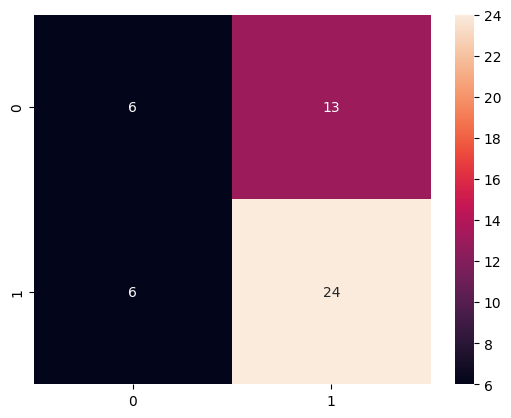

In [13]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.show()

In [15]:
# use random forest for regression
x=df.drop('tip',axis=1)
y=df['tip']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [19]:
print(f"r2 score: {r2_score(y_test,y_pred)}")
print(f"root mean squared error: {root_mean_squared_error(y_test,y_pred)}")

r2 score: 0.2138458226181067
root mean squared error: 0.9912972282286877
